In [1]:
import pandas as pd

In [2]:
fruits = pd.Series(["kiwi", "mango", "strawberry", "pineapple", \
           "gala apple", "honeycrisp apple", "tomato", \
           "watermelon", "honeydew", "kiwi", "kiwi", "kiwi", \
           "mango", "blueberry", "blackberry", "gooseberry", \
           "papaya"])

In [3]:
fruit_list = [fruit for fruit in fruits]
fruit_list

['kiwi',
 'mango',
 'strawberry',
 'pineapple',
 'gala apple',
 'honeycrisp apple',
 'tomato',
 'watermelon',
 'honeydew',
 'kiwi',
 'kiwi',
 'kiwi',
 'mango',
 'blueberry',
 'blackberry',
 'gooseberry',
 'papaya']

In [4]:
fruits.describe()

count       17
unique      13
top       kiwi
freq         4
dtype: object

In [5]:
fruits.value_counts()

kiwi                4
mango               2
watermelon          1
tomato              1
honeycrisp apple    1
gooseberry          1
strawberry          1
blueberry           1
papaya              1
gala apple          1
honeydew            1
pineapple           1
blackberry          1
dtype: int64

In [6]:
max(fruits.str.len())

16

In [7]:
fruits[fruits.apply(lambda s: len(s) == max(fruits.str.len()))]

5    honeycrisp apple
dtype: object

In [8]:
fruits[fruits.apply(lambda s: len(s) >= 5)]

1                mango
2           strawberry
3            pineapple
4           gala apple
5     honeycrisp apple
6               tomato
7           watermelon
8             honeydew
12               mango
13           blueberry
14          blackberry
15          gooseberry
16              papaya
dtype: object

In [9]:
fruits.str.capitalize()

0                 Kiwi
1                Mango
2           Strawberry
3            Pineapple
4           Gala apple
5     Honeycrisp apple
6               Tomato
7           Watermelon
8             Honeydew
9                 Kiwi
10                Kiwi
11                Kiwi
12               Mango
13           Blueberry
14          Blackberry
15          Gooseberry
16              Papaya
dtype: object

In [10]:
fruits.str.count('a').sum()

14

In [11]:
vowels = list('aeiou')

def count_vowels(word):
    count = 0
    for letter in word:
        if letter in vowels:
            count += 1
    return count

fruits.apply(count_vowels)

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [12]:
fruits.str.count(r'[aeiou]')

0     2
1     2
2     2
3     4
4     4
5     5
6     3
7     4
8     3
9     2
10    2
11    2
12    2
13    3
14    2
15    4
16    3
dtype: int64

In [13]:
fruits.apply(lambda s: s in 'aeiou')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
dtype: bool

In [14]:
nums = [fruit for fruit in fruits.apply(count_vowels)]
test = pd.Series(nums)
test.index = fruit_list

In [15]:
test

kiwi                2
mango               2
strawberry          2
pineapple           4
gala apple          4
honeycrisp apple    5
tomato              3
watermelon          4
honeydew            3
kiwi                2
kiwi                2
kiwi                2
mango               2
blueberry           3
blackberry          2
gooseberry          4
papaya              3
dtype: int64

In [16]:
def count_o(word):
    count = 0
    for letter in word:
        if letter == 'o':
            count += 1
    return count

fruits[fruits.apply(lambda s: count_o(s) > 1)]

6         tomato
15    gooseberry
dtype: object

In [17]:
fruits[fruits.apply(lambda s: 'berry' in s)]

2     strawberry
13     blueberry
14    blackberry
15    gooseberry
dtype: object

In [18]:
fruits[fruits.apply(lambda s: 'apple' in s)]

3           pineapple
4          gala apple
5    honeycrisp apple
dtype: object

In [19]:
max(nums)

5

In [20]:
fruits[fruits.apply(lambda s: count_vowels(s) == max(nums))]

5    honeycrisp apple
dtype: object

In [21]:
series_2 = pd.Series(['$796,459.41', '$278.60', '$482,571.67', 
     '$4,503,915.98', '$2,121,418.3', '$1,260,813.3', 
     '$87,231.01', '$1,509,175.45', '$4,138,548.00', 
     '$2,848,913.80', '$594,715.39', '$4,789,988.17', 
     '$4,513,644.5', '$3,191,059.97', '$1,758,712.24', 
     '$4,338,283.54', '$4,738,303.38', '$2,791,759.67', 
     '$769,681.94', '$452,650.23'])

In [22]:
type(series_2)

pandas.core.series.Series

In [23]:
new_2 = series_2.str.replace(',', '').str.replace('$', '').astype(float)

In [24]:
max(new_2)

4789988.17

In [25]:
min(new_2)

278.6

In [26]:
pd.cut(new_2, 4).value_counts()

(-4511.11, 1197705.993]       7
(3592560.778, 4789988.17]     6
(1197705.993, 2395133.385]    4
(2395133.385, 3592560.778]    3
dtype: int64

In [27]:
x, y = pd.cut(new_2, 4, retbins=True)
bin_list = list(y)

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

([<matplotlib.axis.XTick at 0x11c853550>,
 <a list of 5 Text xticklabel objects>)

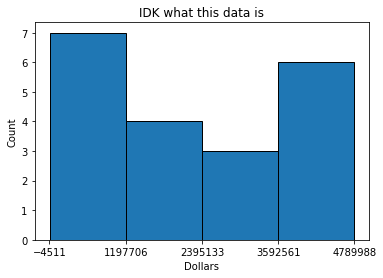

In [29]:
new_2.plot.hist(bins=4, edgecolor='black')
plt.title('IDK what this data is')
plt.ylabel('Count')
plt.xlabel('Dollars')
plt.xticks(bin_list)

In [30]:
series_3 = pd.Series([60, 86, 75, 62, 93, 71, 60, 83, 95, 78, 
                      65, 72, 69, 81, 96, 80, 85, 92, 82, 78])

In [31]:
series_3.max()
series_3.min()
series_3.mean()
series_3.median()

79.0

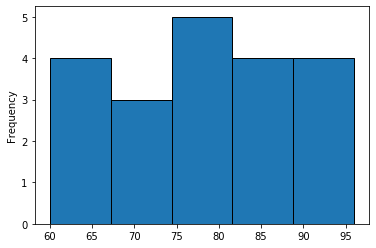

In [32]:
series_3.plot.hist(bins=5, edgecolor='black')

In [33]:
letter_grade = series_3.apply(lambda s: (s>=90 and 'A') or (s>=80 and 'B') 
                        or (s>=70 and 'C') or (s>=60 and 'D') or 'F')

In [34]:
test = letter_grade
test.index = series_3
test

60    D
86    B
75    C
62    D
93    A
71    C
60    D
83    B
95    A
78    C
65    D
72    C
69    D
81    B
96    A
80    B
85    B
92    A
82    B
78    C
dtype: object

In [35]:
curved_grades = series_3 + 100 - series_3.max()
curved_grades

0      64
1      90
2      79
3      66
4      97
5      75
6      64
7      87
8      99
9      82
10     69
11     76
12     73
13     85
14    100
15     84
16     89
17     96
18     86
19     82
dtype: int64

In [36]:
series_4 = pd.Series('hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyffsjpsrabtjzsypmzadfavyrnndndvswreauxovncxtwzpwejilzjrmmbbgbyxvjtewqthafnbkqplarokkyydtubbmnexoypulzwfhqvckdpqtpoppzqrmcvhhpwgjwupgzhiofohawytlsiyecuproguy')
series_4

0    hnvidduckkqxwymbimkccexbkmqygkxoyndmcxnwqarhyf...
dtype: object

In [37]:
test = []
r = series_4.apply(lambda s: [test.append(letter) for letter in s])
new_4 = pd.Series(test)
new_4.value_counts()

y    13
p    12
w    10
m     9
b     9
n     9
k     9
h     8
a     8
r     8
d     8
o     8
c     8
x     8
q     8
u     7
v     7
z     7
t     7
f     6
j     6
e     6
i     5
s     5
g     5
l     4
dtype: int64

In [38]:
new_4

0      h
1      n
2      v
3      i
4      d
      ..
195    r
196    o
197    g
198    u
199    y
Length: 200, dtype: object

In [39]:
vowels_in_4 = new_4.apply(count_vowels).sum()
vowels_in_4

34

In [40]:
((~ new_4.apply(count_vowels)) + 2).sum()

166

In [41]:
len(new_4[new_4.apply(lambda s: s in 'aeiou')])

34

In [42]:
len(new_4) - vowels_in_4

166

In [43]:
len(new_4[~new_4.apply(lambda s: s in 'aeiou')])

166

In [44]:
new_4.str.upper()

0      H
1      N
2      V
3      I
4      D
      ..
195    R
196    O
197    G
198    U
199    Y
Length: 200, dtype: object

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

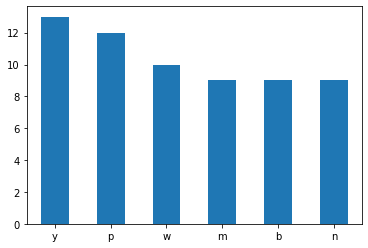

In [45]:
new_4.value_counts().head(6).plot.bar()
plt.xticks(rotation=0)

In [46]:
~1

-2